# Exercise 5A

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import data_analytics_lib as dal
import pandas as pd 

# Data for least squares quadratic
x = [-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0]
y = [10.0,6.0,2.0,1.0,0.0,2.0,4.0,7.0]

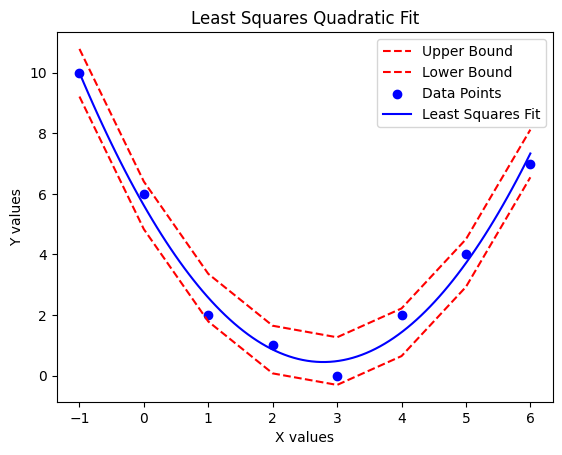

In [2]:
def least_squares_matrixes(x_data, y_data, fit = 1):
    ''' Function to find the least squares matrix
        x_data : list
            List of data points for X
        y_data : list
            List of data points for Y
        Returns :
            least_squares_matrix_left : matrix
                Left hand side least squares matrix
            least_squares_matrix_right : matrix
                Right hand side least squares matrix '''
        
    # print(x_data)
    n = len(x_data)
    
    if fit == 1:
        x_array = np.array(x_data)
        y_array = np.array(y_data)
      
        a = sum(x_array ** 2)
        b = sum(x_array)
        c = b
        d = n
        e = sum(x_array * y_array)
        f = sum(y_array)
        
        least_squares_matrix_left = [[a, b], [c, d]]
        least_squares_matrix_right = [[e], [f]]
        
    if fit == 2:
        x_array = np.array(x_data)
        y_array = np.array(y_data)
        
        a = sum(x_array ** 4)
        b = sum(x_array ** 3)
        c = sum(x_array ** 2)
        d = sum(x_array)
        e = n
        
        f = sum((x_array ** 2) * y_array)
        g = sum(x_array * y_array)
        h = sum(y_array)
        
        least_squares_matrix_left = [[a, b, c], [b, c, d], [c, d, e]]
        least_squares_matrix_right = [[f], [g], [h]]
    
    return least_squares_matrix_left, least_squares_matrix_right

def matrix_inverse(A, ifit = 1):
    ''' Function computes the inverse matrix for either the 2X2 linear least squares matrix
    or the 3X3 quadratic least square fit, depending on the value of ifit
    
    Inputs :
        A - The least squares matrix to be inverted input as a 2 dimensional Python list
        ifit - the degree of the polynomial to be fitted (either 1 or 2)
        
    Outputs :
        A_inv - The inverse of the least squares matrix output as a 2
        dimensional Python list'''
    
    if ifit == 1:
        a_matrix = A
        
        a1 = a_matrix[0][0]
        b1 = a_matrix[0][1]
        c1 = a_matrix[1][0]
        d1 = a_matrix[1][1]
        
        det = (a1 * d1) - (b1 * c1)
        
        a2 = a_matrix[1][1]/det
        b2= -a_matrix[0][1]/det
        c2 = -a_matrix[1][0]/det
        d2 = a_matrix[0][0]/det
        
        a_inverse = [[a2, b2],
                    [c2, d2]]
        
    if ifit == 2:
        a_matrix = A
        
        a1 = a_matrix[0][0]
        b1 = a_matrix[0][1]
        c1 = a_matrix[0][2]
        d1 = a_matrix[1][0]
        e1 = a_matrix[1][1]
        f1 = a_matrix[1][2]
        g1 = a_matrix[2][0]
        h1 = a_matrix[2][1]
        i1 = a_matrix[2][2]
        
        det = (a1 * (e1 * i1 - f1 * h1) - b1 * (d1 * i1 - f1 * g1) + c1 * (d1 * h1 - e1 * g1))
        
        a2 = (e1 * i1 - f1 * h1)/det
        b2 = (c1 * h1 - b1 * i1)/det
        c2 = (b1 * f1 - c1 * e1)/det
        d2 = (f1 * g1 - d1 * i1)/det
        e2 = (a1 * i1 - c1 * g1)/det
        f2 = (c1 * d1 - a1 * f1)/det
        g2 = (d1 * h1 - e1 * g1)/det
        h2 = (b1 * g1 - a1 * h1)/det
        i2 = (a1 * e1 - b1 * d1)/det
        
        a_inverse = [[a2, b2, c2],
                     [d2, e2, f2],
                     [g2, h2, i2]]
        
    return a_inverse

def least_squares_coefficient(x_list, y_list, ifit = 1):
    ''' Function to find least squares coefficients for linear fit
        A : matrix
            Left hand side least squares matrix
        B : matrix
            Right hand side least squares matrix '''

    A, B = least_squares_matrixes(x_list, y_list, fit=ifit)
    
    A = matrix_inverse(A, ifit)
    
    a = A[0][0] * B[0][0] + A[0][1] * B[1][0] + A[0][2] * B[2][0]
    b = A[1][0] * B[0][0] + A[1][1] * B[1][0] + A[1][2] * B[2][0]
    c = A[2][0] * B[0][0] + A[2][1] * B[1][0] + A[2][2] * B[2][0]
    
    if ifit == 1:

        
        least_squares_coefficients = [[a, b]]
        
    if ifit == 2 :

        least_squares_coefficients = [[a, b, c]]
    
    return least_squares_coefficients

# print(least_squares_coefficient(x,y, ifit = 2))

def graph__least_squares(x_data, y_data, x_axis = '', y_axis = '', title = '', fit = 1):
    ''' Function to graph least squares fit along with data points
        x_data : list
            List of data points for X
        y_data : list
            List of data points for Y
        x_axis : str
            Label for x axis
        y_axis : str
            Label for y axis
        title : str
            Title for the graph
        fit : int
            Degree of polynomial fit (1 for linear, 2 for quadratic)'''
    
    coefficients = least_squares_coefficient(x_data, y_data, ifit = fit)
    
    plt.scatter(x_data, y_data, color='blue', label='Data Points')
    
    a = coefficients[0][0]
    b = coefficients[0][1]
    c = coefficients[0][2]
    
    if fit == 1:

        x_fit = np.linspace(min(x_data), max(x_data), 100)
        y_fit = a * x_fit + b
        plt.plot(x_fit, y_fit, color='blue', label='Least Squares Fit')
        
    if fit == 2:
        
        x_fit = np.linspace(min(x_data), max(x_data), 100)
        y_fit = a * x_fit ** 2 + b * x_fit + c
        plt.plot(x_fit, y_fit, color='blue', label='Least Squares Fit')

    
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.title(title)
    plt.legend()
    plt.show()

def calculate_residuals(x_data, y_data, ifit = 1):
    
    x_array = np.array(x_data)
    y_array = np.array(y_data)
    
    least_square_line_y_values = []
    
    fit_residual = []
    
    if ifit == 1:
        least_squares_coefficients = least_squares_coefficient(x_array, y_array)
        
        for x in x_array:
            least_square_line_y_values.append((least_squares_coefficients[0][0] * x) + least_squares_coefficients[0][1])
        
        for y in y_array:
            fit_residual.append(y - least_square_line_y_values[len(fit_residual)])
    
        residual_mean = np.mean(fit_residual)
        residual_std = np.std(fit_residual)
        
    if ifit == 2:
        least_squares_coefficients = least_squares_coefficient(x_array, y_array, ifit = 2)
        
        for x in x_array:
            least_square_line_y_values.append((least_squares_coefficients[0][0] * (x ** 2)) + (least_squares_coefficients[0][1] * x) + least_squares_coefficients[0][2])
        
        for y in y_array:
            fit_residual.append(y - least_square_line_y_values[len(fit_residual)])
    
        residual_mean = np.mean(fit_residual)
        residual_std = np.std(fit_residual)
        
    return fit_residual, residual_mean, residual_std

def error_bar_bounds(x_data, y_data, fit = 1):
    x = x_data
    y = y_data
    
    residuals, residual_mean, residual_std_dev = calculate_residuals(x, y, ifit = fit)
    correlation_coefficients = least_squares_coefficient(x, y, ifit = fit)
    
    upper_boundx = []
    upper_boundy = []

    lower_boundx = []
    lower_boundy = []
    
    if fit == 1:
        

        upper_boundx.append(np.min(x))
        upper_boundx.append(np.max(x))

        lower_boundx.append(np.min(x))
        lower_boundx.append(np.max(x))

        y_upper_min = (correlation_coefficients[0][0]*np.min(x)) + (correlation_coefficients[0][1] - (residual_mean - 2 * residual_std_dev))
        y_upper_max = (correlation_coefficients[0][0]*np.max(x)) + (correlation_coefficients[0][1] + (residual_mean + 2 * residual_std_dev))

        upper_boundy.append(y_upper_min)
        upper_boundy.append(y_upper_max)

        y_lower_min = (correlation_coefficients[0][0]*np.min(x)) + (correlation_coefficients[0][1] - (residual_mean + 2 * residual_std_dev))
        y_lower_max = (correlation_coefficients[0][0]*np.max(x)) + (correlation_coefficients[0][1] + (residual_mean - 2 * residual_std_dev))

        lower_boundy.append(y_lower_min)
        lower_boundy.append(y_lower_max)

    if fit == 2:
        
        for i in range(len(x)):
            upper_boundx.append(x[i])
            lower_boundx.append(x[i])
            
            y_upper = (correlation_coefficients[0][0] * (x[i] ** 2)) + (correlation_coefficients[0][1] * x[i]) + correlation_coefficients[0][2] + (residual_mean + 2 * residual_std_dev)
            y_lower = (correlation_coefficients[0][0] * (x[i] ** 2)) + (correlation_coefficients[0][1] * x[i]) + correlation_coefficients[0][2] - (residual_mean + 2 * residual_std_dev)
            
            upper_boundy.append(y_upper)
            lower_boundy.append(y_lower)
            
    return upper_boundy, upper_boundx, lower_boundx, lower_boundy
    
    
def graphing_error_bars(x_data, y_data, fit = 1):
    upper_boundy, upper_boundx, lower_boundx, lower_boundy = error_bar_bounds(x_data, y_data, fit)
    
    
    plt.plot(upper_boundx, upper_boundy, color='red', linestyle='--', label='Upper Bound')
    plt.plot(lower_boundx, lower_boundy, color='red', linestyle='--', label='Lower Bound')
    
    plt.xlabel('X values')
    plt.ylabel('Y values')
    plt.title('Error Bounds for Least Squares Fit')
    plt.legend()


graphing_error_bars(x, y, fit = 2)
graph__least_squares(x, y, x_axis='X values', y_axis='Y values', title='Least Squares Quadratic Fit', fit=2)

